There's been some discrepancy with the normalization(?) of the 3PCF. This notebook is to examine the output. 

In [1]:
import numpy as np 
from emanu import util as UT
from emanu import obvs as Obvs

In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

In [3]:
import matplotlib.colors as colors
# set the colormap and centre the colorbar
class MidpointNormalize(colors.Normalize):
    """
    Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)

    e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))
    """
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a
        # simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

In [9]:
def read3PCF(mneut, i, nzbin, i_dr=range(7), zspace=False, nside=20, nbin=20): 
    tpcf_i = Obvs.threePCF_halo(mneut, i, nzbin, zspace=zspace, i_dr=i_dr, nside=nside, nbin=nbin)
    
    for ell in range(11): 
        if ell == 0: 
            tpcf_mat = np.zeros((11, tpcf_i[0].shape[0], tpcf_i[0].shape[1]))
            tpcf_mat[0] = tpcf_i[0]
        else: 
            tpcf_mat[ell] = tpcf_i[ell]
    return tpcf_mat

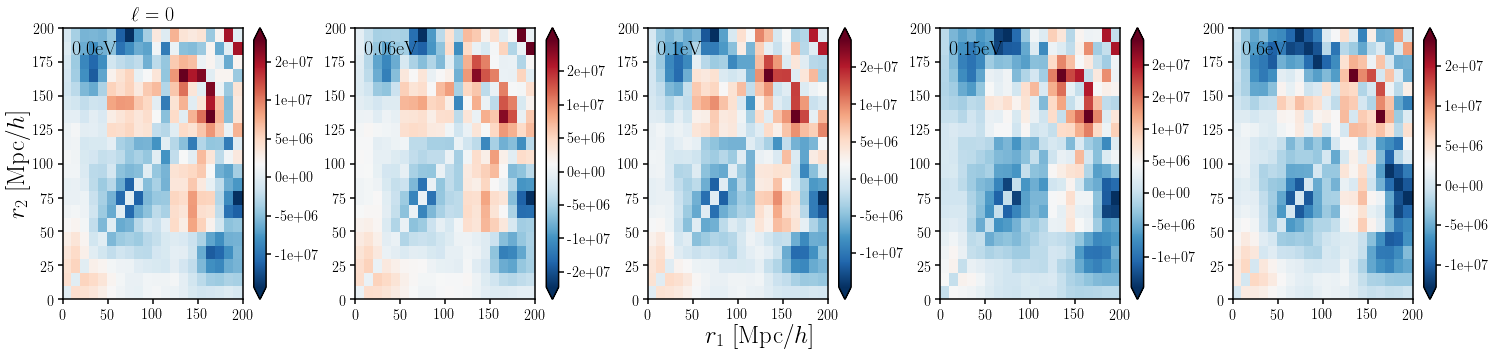

In [10]:
fig = plt.figure(figsize=(25,5))
bkgd = fig.add_subplot(111, frameon=False)
for i_m, mn in enumerate([0.0, 0.06, 0.1, 0.15, 0.6]): 
    mu_tpcf = read3PCF(mn, 1, 4)
    for ell in range(1):
        sub = fig.add_subplot(1,5,i_m+1)
        if ell == 0: vlim = [-8e6, 8e6]
        elif ell == 1: vlim = [-6e6, 6e6]
        elif ell == 2: vlim = [-4e6, 4e6]
        elif ell == 3: vlim = [-4e6, 4e6]
        cont = sub.pcolormesh(np.linspace(0., 200., 21), 
                              np.linspace(0., 200., 21), 
                              mu_tpcf[ell], cmap='RdBu_r')#, vmin=vlim[0], vmax=vlim[1])##, norm=MidpointNormalize(vmin=vlim[0], vmax=midpoint=0.)) #, cmap='afmhot')
        plt.colorbar(cont, format='%.0e', extend='both')
        if i_m == 0: sub.set_title("$\ell="+str(ell)+"$", fontsize=20)
        if ell == 0: sub.text(0.05, 0.9, str(mn)+'eV', 
                              transform=sub.transAxes, fontsize=20)#, color='white')
bkgd.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
bkgd.set_xlabel(r'$r_1$ [Mpc/$h$]', fontsize=25)
bkgd.set_ylabel(r'$r_2$ [Mpc/$h$]', fontsize=25)
fig.subplots_adjust(hspace=0.2, wspace=0.3)

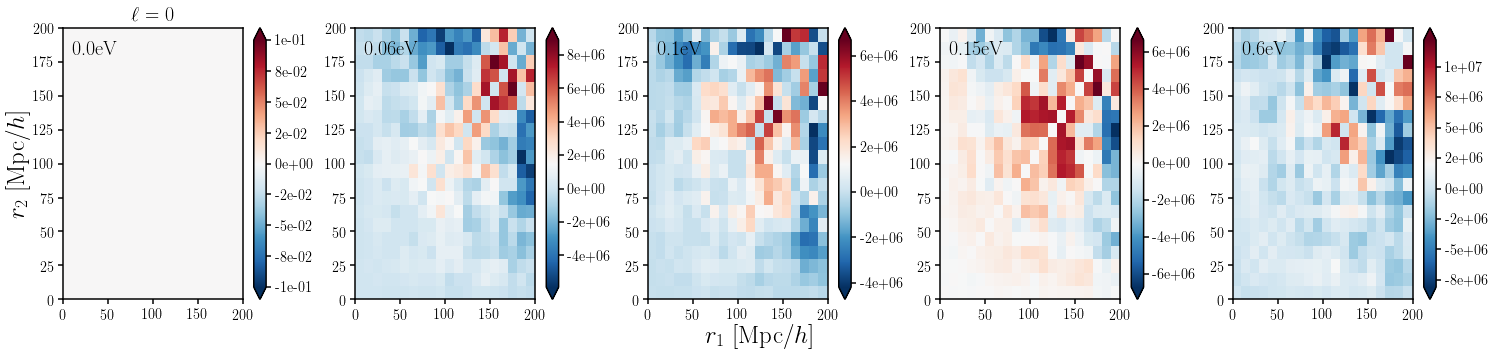

In [11]:
fig = plt.figure(figsize=(25,5))
bkgd = fig.add_subplot(111, frameon=False)
for i_m, mn in enumerate([0.0, 0.06, 0.1, 0.15, 0.6]): 
    mu_tpcf = read3PCF(mn, 2, 4)
    mu_tpcf0 = read3PCF(0.0, 2, 4)
    for ell in range(1):
        sub = fig.add_subplot(1,5,i_m+1)
        if ell == 0: vlim = [-8e6, 8e6]
        elif ell == 1: vlim = [-6e6, 6e6]
        elif ell == 2: vlim = [-4e6, 4e6]
        elif ell == 3: vlim = [-4e6, 4e6]
        cont = sub.pcolormesh(np.linspace(0., 200., 21), 
                              np.linspace(0., 200., 21), 
                              mu_tpcf[ell] - mu_tpcf0[ell], cmap='RdBu_r')#, vmin=vlim[0], vmax=vlim[1])##, norm=MidpointNormalize(vmin=vlim[0], vmax=midpoint=0.)) #, cmap='afmhot')
        plt.colorbar(cont, format='%.0e', extend='both')
        if i_m == 0: sub.set_title("$\ell="+str(ell)+"$", fontsize=20)
        if ell == 0: sub.text(0.05, 0.9, str(mn)+'eV', 
                              transform=sub.transAxes, fontsize=20)#, color='white')
bkgd.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
bkgd.set_xlabel(r'$r_1$ [Mpc/$h$]', fontsize=25)
bkgd.set_ylabel(r'$r_2$ [Mpc/$h$]', fontsize=25)
fig.subplots_adjust(hspace=0.2, wspace=0.3)

In [12]:
def mu_tpcfs(mneut): 
    nzbin = 4
    zspace = False

    tpcfs = [] 
    for ireal in range(1,101): 
        tpcfs.append(read3PCF(mneut, ireal, nzbin, zspace=zspace, nside=20, nbin=20))
    tpcfs = np.array(tpcfs)
    mu_tpcfs = np.average(tpcfs, axis=0)
    return mu_tpcfs 

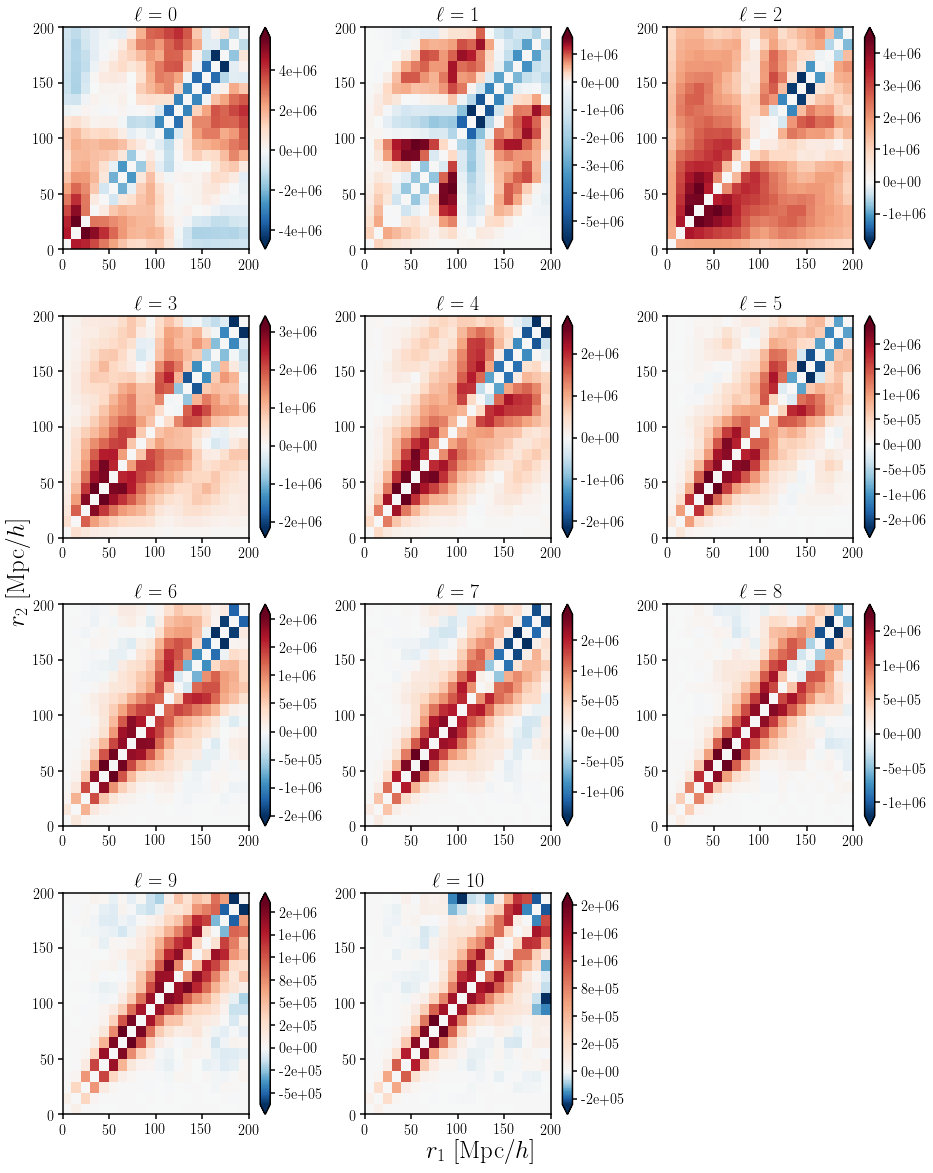

In [13]:
fig = plt.figure(figsize=(15,20))
bkgd = fig.add_subplot(111, frameon=False)
for ell in range(11):
    sub = fig.add_subplot(4,3,ell+1)
    mu_tpcf = mu_tpcfs(0.0)
    cont = sub.pcolormesh(np.linspace(0., 200., 21), np.linspace(0., 200., 21), 
                          mu_tpcf[ell], cmap='RdBu_r', norm=MidpointNormalize(midpoint=0.)) #, cmap='afmhot')
    plt.colorbar(cont, format='%.0e', extend='both')
    sub.set_title("$\ell="+str(ell)+"$", fontsize=20)
    
bkgd.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
bkgd.set_xlabel(r'$r_1$ [Mpc/$h$]', fontsize=25)
bkgd.set_ylabel(r'$r_2$ [Mpc/$h$]', fontsize=25)
fig.subplots_adjust(hspace=0.3, wspace=0.3)

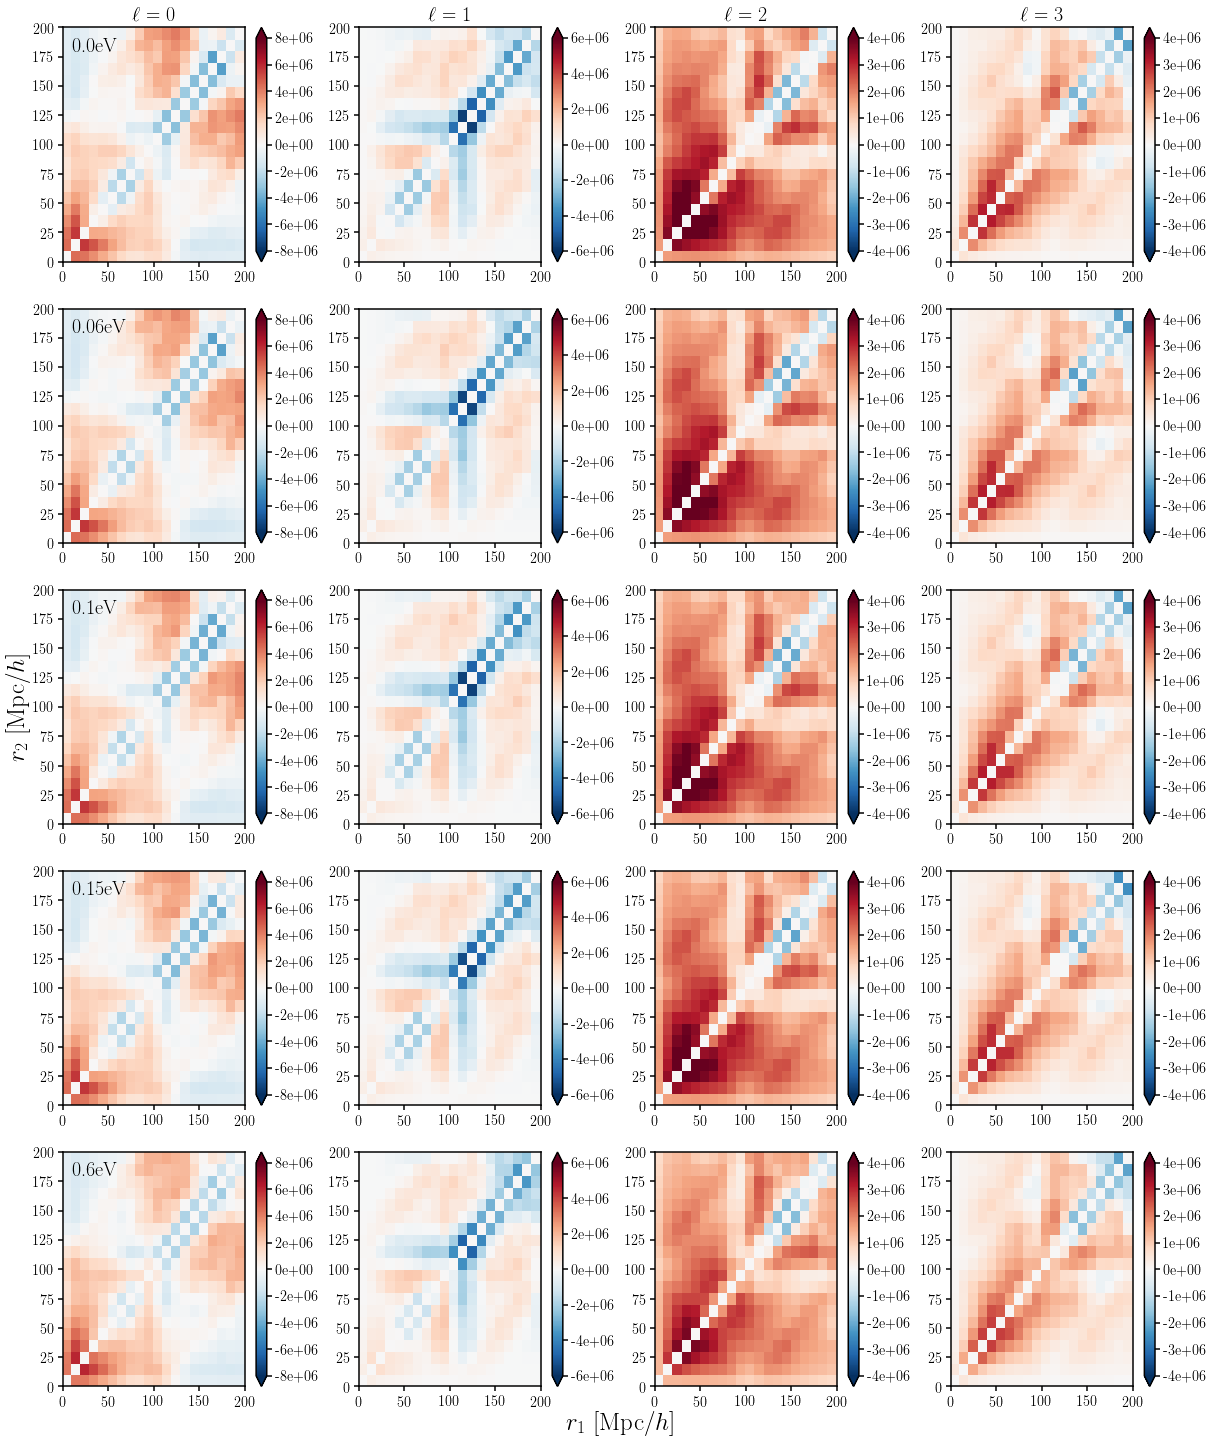

In [14]:
fig = plt.figure(figsize=(20,25))
bkgd = fig.add_subplot(111, frameon=False)
for i_m, mn in enumerate([0.0, 0.06, 0.1, 0.15, 0.6]): 
    mu_tpcf = mu_tpcfs(mn)
    for ell in range(4):
        sub = fig.add_subplot(5,4,i_m*4+ell+1)
        if ell == 0: vlim = [-8e6, 8e6]
        elif ell == 1: vlim = [-6e6, 6e6]
        elif ell == 2: vlim = [-4e6, 4e6]
        elif ell == 3: vlim = [-4e6, 4e6]
        cont = sub.pcolormesh(np.linspace(0., 200., 21), 
                              np.linspace(0., 200., 21), 
                              mu_tpcf[ell], cmap='RdBu_r', vmin=vlim[0], vmax=vlim[1])##, norm=MidpointNormalize(vmin=vlim[0], vmax=midpoint=0.)) #, cmap='afmhot')
        plt.colorbar(cont, format='%.0e', extend='both')
        if i_m == 0: sub.set_title("$\ell="+str(ell)+"$", fontsize=20)
        if ell == 0: sub.text(0.05, 0.9, str(mn)+'eV', 
                              transform=sub.transAxes, fontsize=20)#, color='white')
bkgd.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
bkgd.set_xlabel(r'$r_1$ [Mpc/$h$]', fontsize=25)
bkgd.set_ylabel(r'$r_2$ [Mpc/$h$]', fontsize=25)
fig.subplots_adjust(hspace=0.2, wspace=0.3)

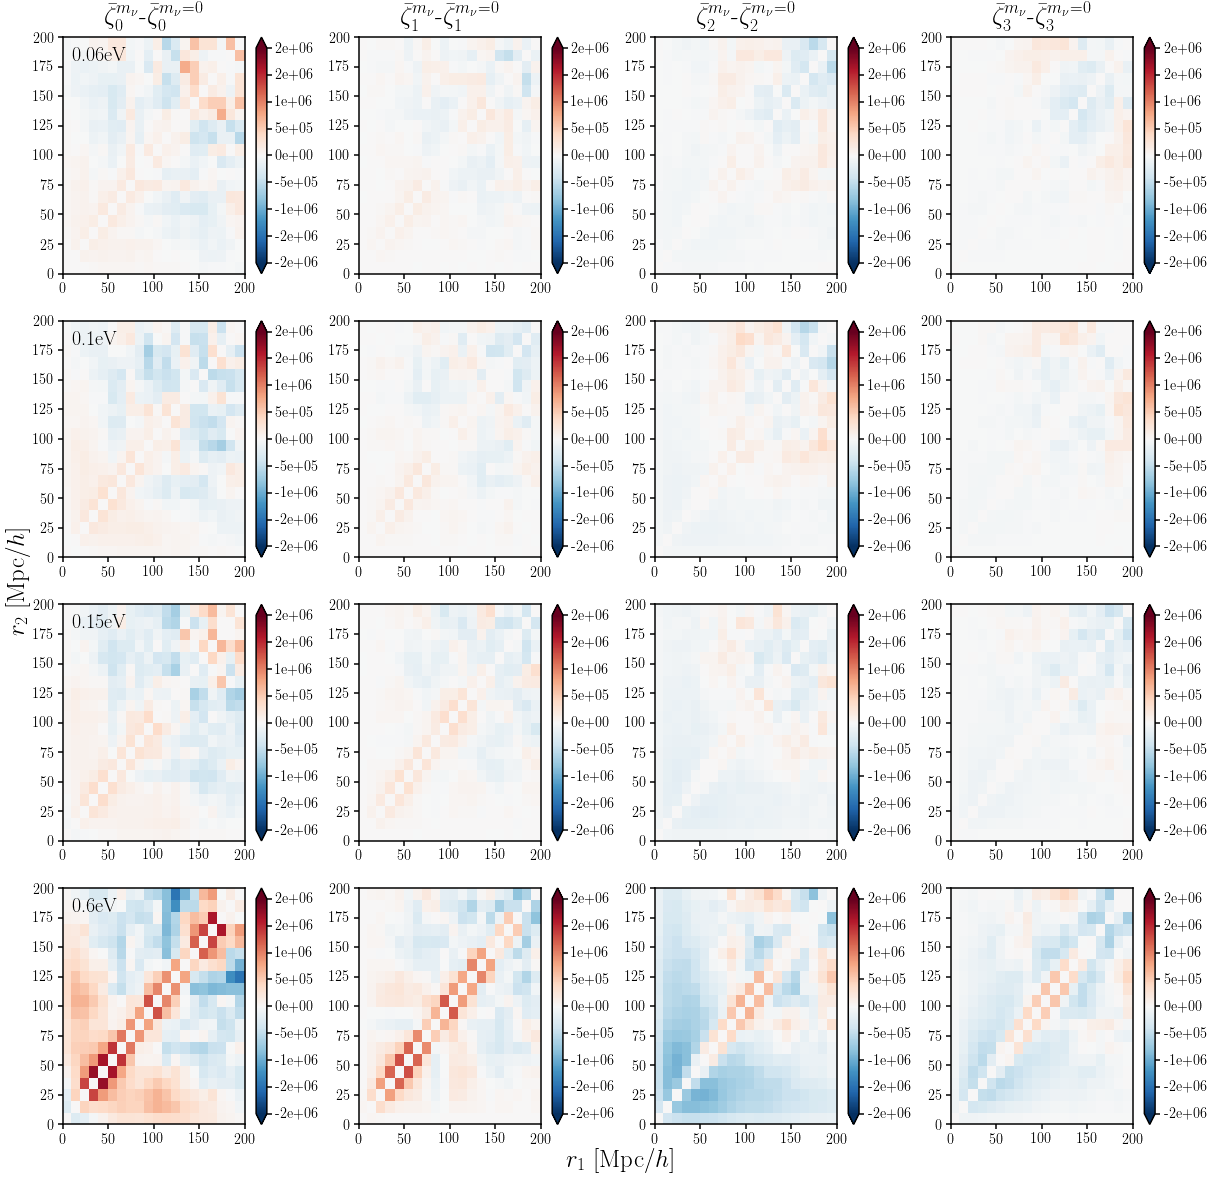

In [15]:
fig = plt.figure(figsize=(20,20))
bkgd = fig.add_subplot(111, frameon=False)
mu_tpcf0 = mu_tpcfs(0.0)
for i_m, mn in enumerate([0.06, 0.1, 0.15, 0.6]): 
    mu_tpcf = mu_tpcfs(mn)
    for ell in range(4):
        vlim = [-2e6, 2e6]
        sub = fig.add_subplot(4,4,i_m*4+ell+1)
        cont = sub.pcolormesh(np.linspace(0., 200., 21), 
                              np.linspace(0., 200., 21), 
                              mu_tpcf[ell] - mu_tpcf0[ell], 
                              cmap='RdBu_r', vmin=vlim[0], vmax=vlim[1]) #norm=MidpointNormalize(midpoint=0.)) #, cmap='afmhot')
        plt.colorbar(cont, format='%.0e', extend='both')
        if i_m == 0: sub.set_title(r"$\bar{\zeta}^{m_\nu}_"+str(ell)+r"$-$\bar{\zeta}^{m_\nu=0}_"+str(ell)+"$", fontsize=25)
        if ell == 0: sub.text(0.05, 0.9, str(mn)+'eV', 
                              transform=sub.transAxes, fontsize=20)#, color='white')
bkgd.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
bkgd.set_xlabel(r'$r_1$ [Mpc/$h$]', fontsize=25)
bkgd.set_ylabel(r'$r_2$ [Mpc/$h$]', fontsize=25)
fig.subplots_adjust(hspace=0.2, wspace=0.3)

/Users/chang/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in divide
  # This is added back by InteractiveShellApp.init_path()


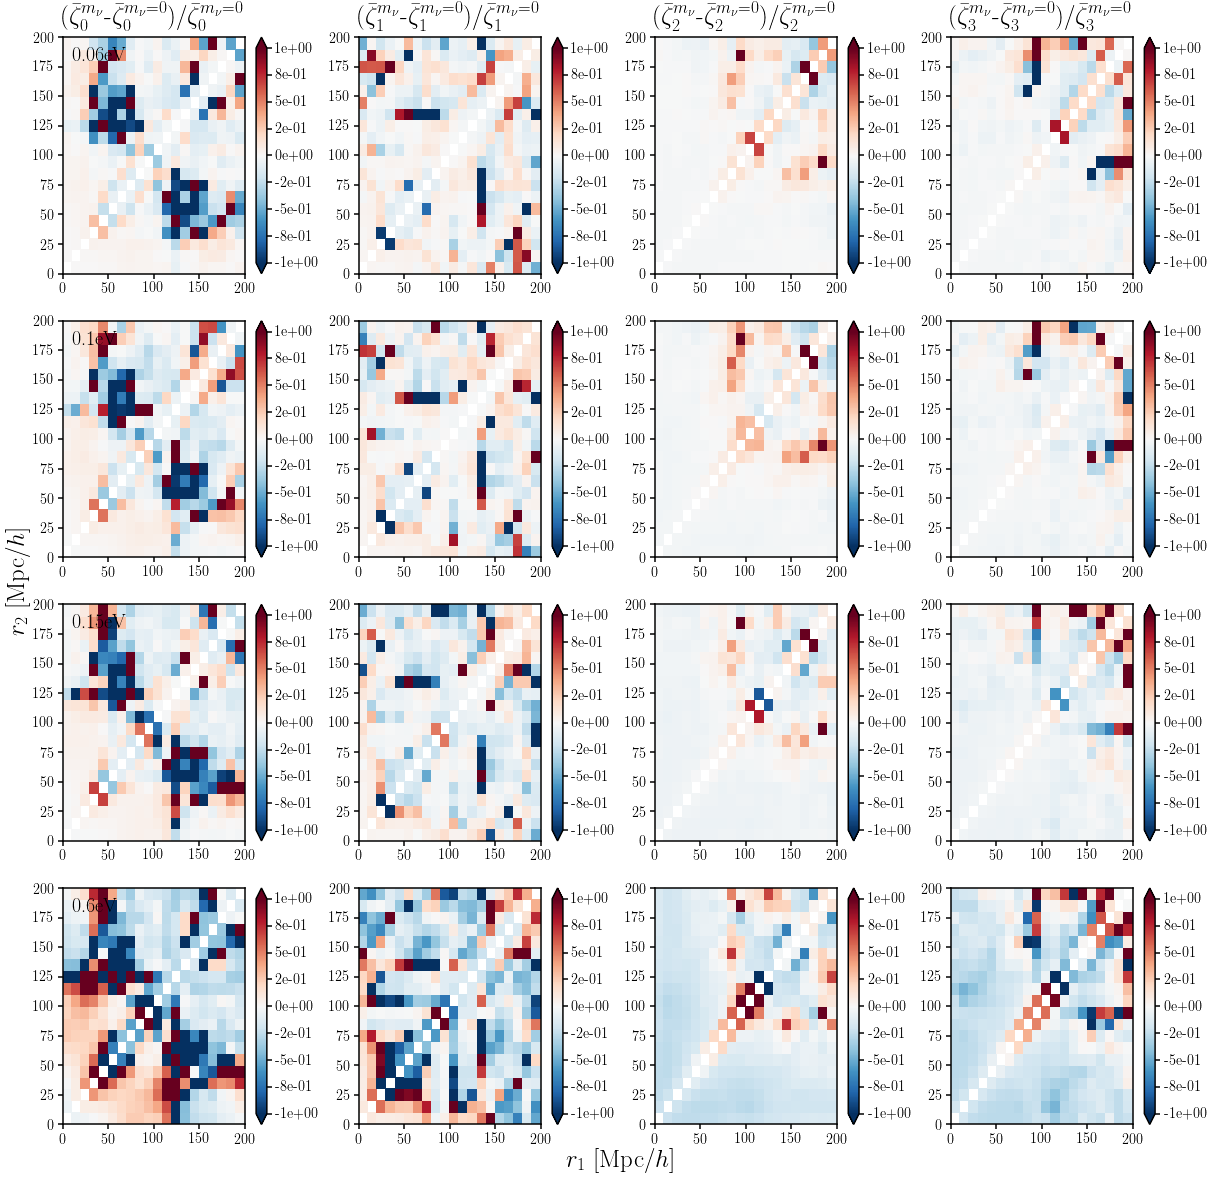

In [16]:
fig = plt.figure(figsize=(20,20))
bkgd = fig.add_subplot(111, frameon=False)
mu_tpcf0 = mu_tpcfs(0.0)
for i_m, mn in enumerate([0.06, 0.1, 0.15, 0.6]): 
    mu_tpcf = mu_tpcfs(mn)
    for ell in range(4):
        vlim = [-1,1]#[-2e6, 2e6]
        sub = fig.add_subplot(4,4,i_m*4+ell+1)
        cont = sub.pcolormesh(np.linspace(0., 200., 21), 
                              np.linspace(0., 200., 21), 
                              (mu_tpcf[ell] - mu_tpcf0[ell])/mu_tpcf0[ell], 
                              cmap='RdBu_r', vmin=vlim[0], vmax=vlim[1]) #norm=MidpointNormalize(midpoint=0.)) #, cmap='afmhot')
        plt.colorbar(cont, format='%.0e', extend='both')
        if i_m == 0: sub.set_title(r"$(\bar{\zeta}^{m_\nu}_"+str(ell)+r"$-$\bar{\zeta}^{m_\nu=0}_"+str(ell)+")$/"+r"$\bar{\zeta}^{m_\nu=0}_"+str(ell)+"$", fontsize=25)
        if ell == 0: sub.text(0.05, 0.9, str(mn)+'eV', 
                              transform=sub.transAxes, fontsize=20)#, color='white')
bkgd.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
bkgd.set_xlabel(r'$r_1$ [Mpc/$h$]', fontsize=25)
bkgd.set_ylabel(r'$r_2$ [Mpc/$h$]', fontsize=25)
fig.subplots_adjust(hspace=0.2, wspace=0.3)